In [ ]:
from logging import raiseExceptions
from tokenize import Double
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import os 
import numpy as np
#import meshplot as mp
import torch
torch.manual_seed(125)
import random
random.seed(125)
from collections import defaultdict
from tree_viewer import draw_tree_splines
from tree_functions import deserialize_post_order_k, serialize_pre_order_k

In [ ]:
class Tree:

    def __init__(self, data, right = None, left = None):

        self.id = id(self)
        self.data = data
  
        self.right = right
        self.left = left

    def toGraph( self, graph, index, dec, flag, proc=True):
        
        radius = self.data['r']
        if dec:
            radius= radius[0]
       
        if flag == 0:
            b = True
            flag = 1
        else:
            b = False
        print("radius", radius)
        graph.add_nodes_from( [ (self.data, {'posicion': radius[0:3], 'radio': radius[3:], 'root': b} ) ])

        
        if self.right is not None:
            self.right.toGraph( graph, index + 1, dec, flag = 1)#
            graph.add_edge( self.data, self.right.data )
           
        if self.left is not None:

            self.left.toGraph( graph, 0, dec, flag = 1)#
            graph.add_edge( self.data, self.left.data)
           
        else:
            return

In [3]:
def remove_below_level(node, level, current_level=1):
    if not node:
        return None
    
    node.left = remove_below_level(node.left, level, current_level + 1)
    node.right = remove_below_level(node.right, level, current_level + 1)
    
    if current_level > level:
        return None
    
    return node


In [4]:
base = "../data"
split = "train"
n = 20
folder_out = f"{base}/p{n}/{split}"
folder_in = f"{base}/train"
print(folder_in)
print(folder_out)

../data/train
../data/p20/train


In [7]:
#t_list = os.listdir("../arbolesLimpios/Trees/" )
#dataset = tDataset(t_list, "../arbolesLimpios/Trees")
n = 20
base = "../../Data/Aneux+Intra-splines"
split = "train"
#folder_out = f"{base}/p{n}/{split}"
#folder_in = f"{base}/{split}"
folder_out = f"{base}/p{n}"
folder_in = f"{base}"


t_list = os.listdir( folder_in)
#t_list = ['C0046.npy']
#folder_out = f"../prueba"

i = 0
d = None


for file in t_list :   
    print("processing", file)
    try:
        input = np.load(folder_in + "/" +file)
        serial_tree = list(input.flatten())
        tree = deserialize_post_order_k(serial_tree, k=39)
        decoded = remove_below_level(tree, n)
        vec = serialize_pre_order_k(decoded, k=39)
        dir = f"{folder_out}/{file.split('.')[0]}.npy"
        np.save(dir, np.array(vec))
        print("len", len(vec)/39)
        print(f"saved to {dir}")
        i += 1
    except Exception as e:
        print("error", e)
        print("error processing", file)

        pass


processing ArteryObjAN1-0-intra.npy
len 35.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-0-intra.npy
processing ArteryObjAN1-11-intra.npy
len 21.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-11-intra.npy
processing ArteryObjAN1-12-intra.npy
len 27.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-12-intra.npy
processing ArteryObjAN1-15-intra.npy
len 17.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-15-intra.npy
processing ArteryObjAN1-16-intra.npy
len 57.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-16-intra.npy
processing ArteryObjAN1-17-intra.npy
len 35.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-17-intra.npy
processing ArteryObjAN1-19-intra.npy
len 31.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-19-intra.npy
processing ArteryObjAN1-2-intra.npy
len 17.0
saved to ../../Data/Aneux+Intra-splines/p20/ArteryObjAN1-2-intra.npy
processing ArteryObjAN1-4-intra.npy
len 25.0
saved to ../../Data/Aneux+Intra

In [6]:
input = np.load("stage1-limpias/0085_01.npy")
print(input)
serial_tree = list(input.flatten())
tree = deserialize_post_order_k(serial_tree, k=39)
decoded = remove_below_level(tree, n)

vec = serialize_pre_order_k(decoded, k=39)
#dir = folder.split("/")[0]+ "/p"+ str(n) +"/" +folder.split("/")[1]+ "/" + file
dir = "stage1-limpias0085_01.npy"
np.save(dir, np.array(vec))
print("len", len(vec)/39)
print(f"saved to {dir}")

FileNotFoundError: [Errno 2] No such file or directory: 'stage1-limpias/0085_01.npy'

In [ ]:
antes = np.load("stage1/train/0014-eps01.npy")
despues = np.load("stage1-limpias/train/0014_01.npy")

In [ ]:
antes.shape, despues.shape

((225, 39), (224, 39))

In [ ]:
antes,despues

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [45.60810089, 45.05810165, 13.30650043, ...,  1.18879273,
          1.35927428,  1.76273105],
        [44.32180023, 42.58679962, 15.5248003 , ...,  1.14207378,
          1.25828036,  1.46402829]]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

Cortar por cantidad de nodos

In [ ]:
len(vec)/39

127.0

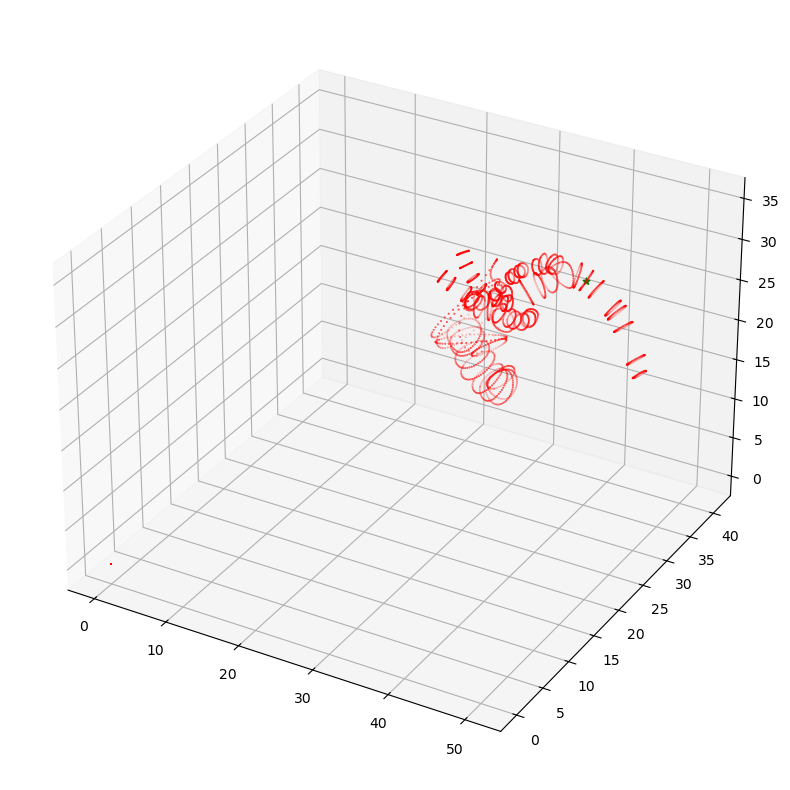

In [ ]:
from tree_viewer import draw_tree
draw_tree_splines(decoded)

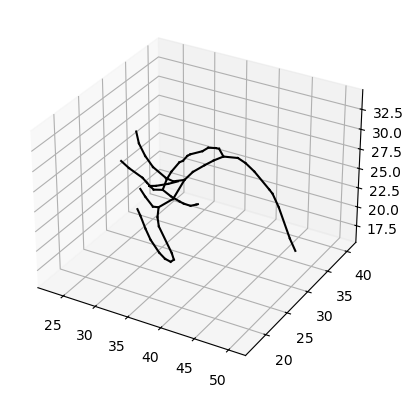

In [ ]:
draw_tree(decoded)

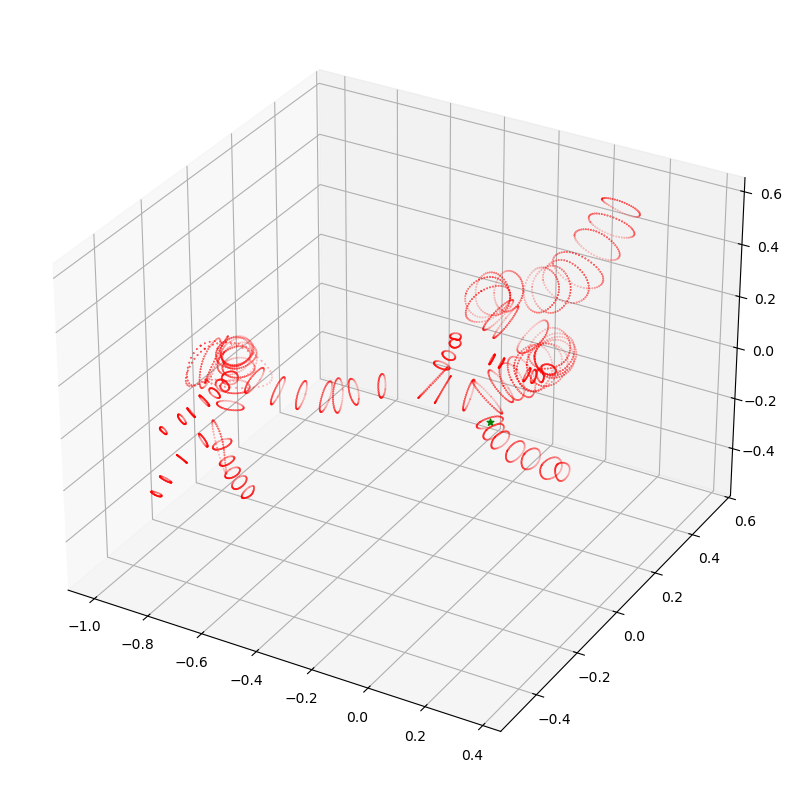

In [ ]:
data = np.load("stage1-augmented/train/rot4-0023-eps01.npy")
serial = list(data.flatten())

tree = deserialize_post_order_k(serial, k = 39)
draw_tree_splines(tree)